<a href="https://colab.research.google.com/github/elliekim9881/study_DL/blob/main/DLfromScratch/lec3_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 신경망

- 앞선 장에서는 AND, OR게이트의 진리표를 보며 인간이 적절한 가중치 값을 정해주었다.
- 신경망의 성질인 적절한 값을 데이터로부터 자동으로 학습하는 능력을 사용하여 가중치 매개변수를 설정해준다.
- 먼저 신경망이 입력 데이터가 무엇인지 식별하는 처리과정을 알아본다.

## 3.1 퍼셉트론에서 신경망으로
- 연결되는 방식은 퍼셉트론과 달라지지 않는다.
- 활성화 함수 : 입력신호의 총 합을 출력신호로 변환하는 함수 <br>
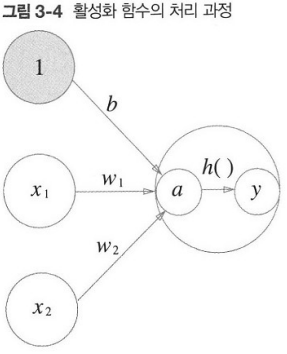

- 가중치 신호를 조합한 결과가 a라는 노드가 되고 활성화함수인 h()를 통과하여 y라는 노드로 변환된다.
- a와y의 원을 노드라고 표현하였는데, 동일하게 뉴런으로도 부를 수 있다. 뉴런을 하나의 원으로 그린다.

## 3.2 활성화 함수
- 계단 함수 : 임계값을 경계로 출력이 바뀌는 활성화 함수
- 시그모이드 함수
 - g(x) = $\frac{1}{1+exp(-x)}$ (exp(-x)는 $e^{-x}$,  e는 자연상수)
 - 신경망에서 자주 사용하는 활성화 함수이다.
- 활성화 함수로 이용되는 시그모이드 함수를 계단 함수와 비교하면서 살펴본다.

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [3]:
import numpy as np
def step_function(x):
  y = x > 0
  return y.astype(np.int)

step_function(np.array([10., 2.0])) #bool 값을 int로 변환. true는 1, false는 0으로 변환

<ipython-input-3-ae6400d4fa77>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


array([1, 1])

- 인수로 실수만 받아들이는 계단함수와 넘파이 배열을 인수로 넣을 수 있는 계단함수를 구현하였다.


<ipython-input-4-513285723b0e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


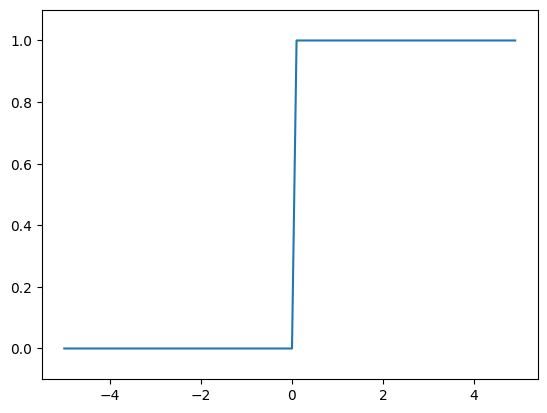

In [4]:
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1) #y축의 범위
plt.show()


- 계단함수눈 0을 경계로 출력이 0에서1로 바뀐다. 값이 바뀌는 형태가 계단같이 생겼다.


- 시그모이드 함수 구현

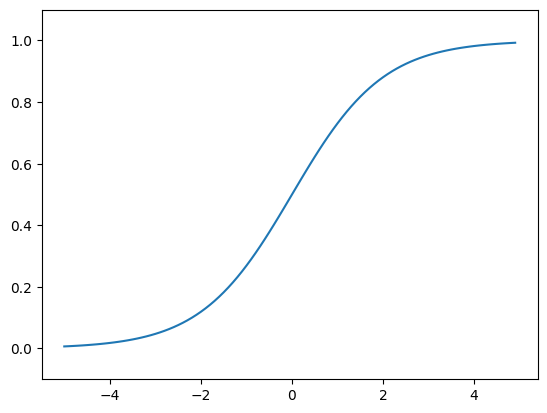

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위
plt.show()

- 시그모이드 함수의 구현과 그래프를 보면 위와 같다.
- 시그모이드 함수와 계단 함수의 차이와 공통점
 - 시그모이드 함수는 곡선, 출력이 연속적으로 변화한다. (신경망 학습에서 중요한 역할을 한다.)
 - 계단 함수는 0을 경계로 출력이 갑자기 바뀐다.
 - 두 함수 모두 작을 때의 출력은 0에 가깝고(0 이거나), 입력이 커지면 출력이 1에 가까워진다(1 이거나)
 - 두 함수 모두 **비선형 함수**이다.
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.(선형 사용 시 층을 깊게 하는 의미 x)

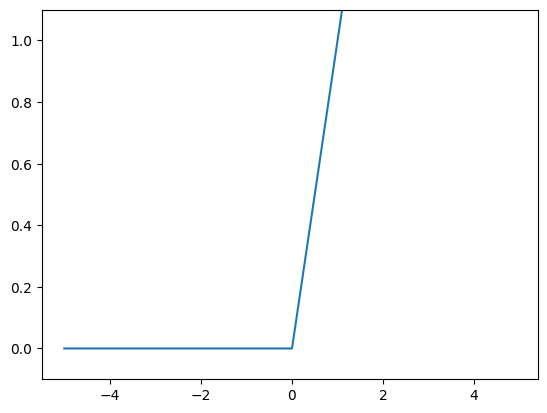

In [20]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위
plt.show()

- ReLU함수의 구현과 그래프이다.
- 입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하이면 0을 출력

## 3.3 다차원 배열의 계산
- 다차원 배열 계산에 대하여 설명한 뒤 신경망을 구현해본다.
- 다차원 배열 = 숫자의 집합

In [35]:
A = np.array([1,2,3,4])
print(A)
np.ndim(A)

[1 2 3 4]


1

In [36]:
A.shape # 배열의 형상 (튜플로 변환)

(4,)

In [27]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
np.ndim(B) #차원 수

[[1 2]
 [3 4]
 [5 6]]


2

In [28]:
B.shape #B는 3X2 배열, 원소가 3개 차원에는 원소가 2개. 가로방향을 행row, 세로방향을 열column

(3, 2)

In [29]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

np.dot(A,B) #행렬의 곱은 np.dot()함수로 계산 가능하다

array([[19, 22],
       [43, 50]])

In [31]:
C = np.array([[1, 2, 3],[3,4,5]])
np.dot(C,A) #행렬 2X3 과 2X2 을 곱하면 오류가 발생

ValueError: ignored

- 신경망에서의 행렬곱을 구현해본다.
- 편향과 활성화는 생략한 형태<br>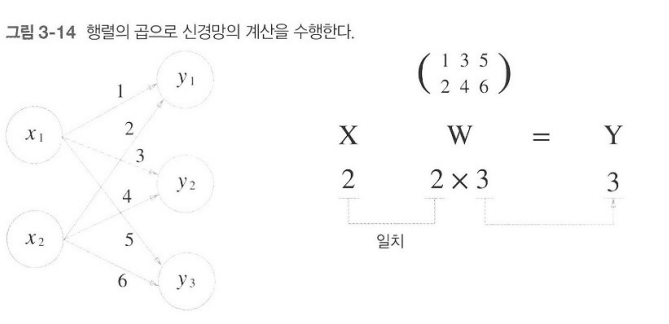

In [37]:
X = np.array([1,2])
W = np.array([[1, 3, 5],[2, 4, 6]])

Y = np.dot(X, W)

print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

- 입력부터 출력까지의 순방향 처리를 구현해본다.
- 신경망에서의 계산을 행렬 계산으로 정리가 가능하다.<br>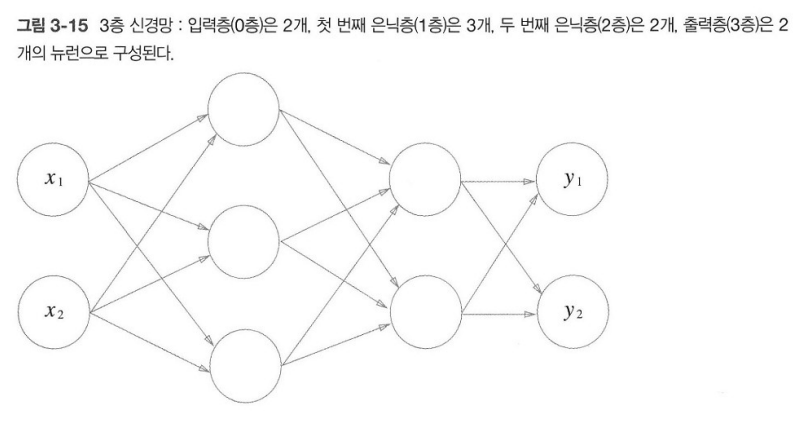

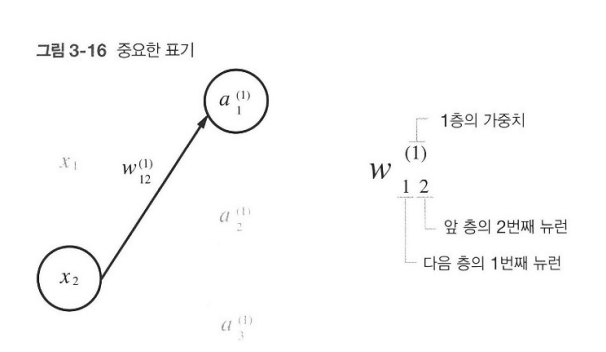
<br>
- 가중치 오른쪽 아래의 인덱스번호는 '다음 층 번호, 앞층 번호' 순으로 작성. 오른쪽 위는 해당하는 층을 나타냄.

- 넘파이의 다차원 배열을 사용하여 구현해본다.<br>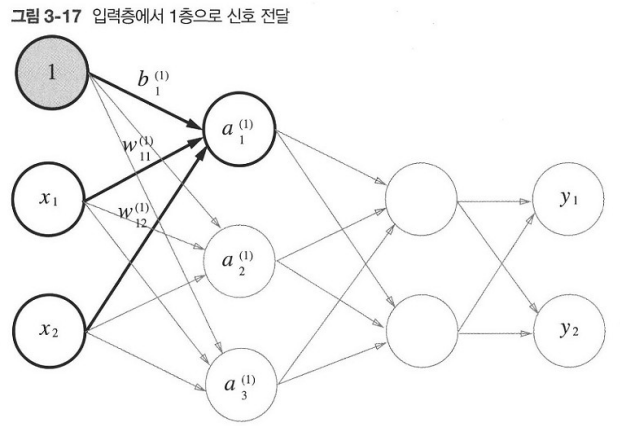

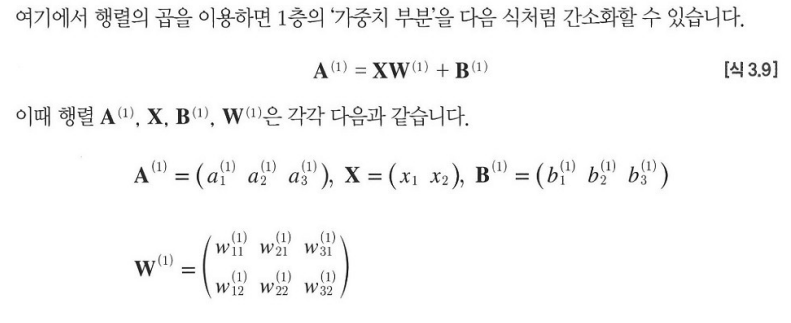

In [46]:
#입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1  #1층으로 전달된 신호

print(Y)

[0.33442224 0.73539486]


- 입력층에서의 활성화 함수 처리를 살펴본다.
- 은닉층에서의 가중치 합을 a로 표기하고 활성화 함수를 h()로 변환된 신호는 z로 표기
- 활성화 함수로는 시그모이드 함수를 사용한다.<br>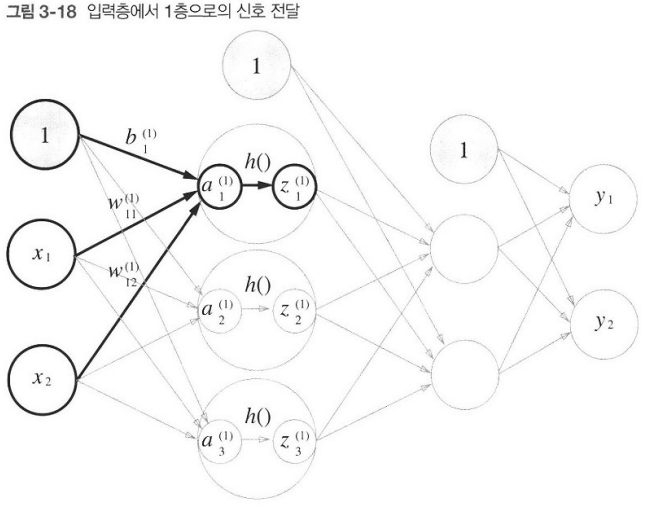

In [47]:
Z1 = sigmoid(A1) #1층으로 전달된 신호에 활성화 함수 처리

print('1층으로 전달된 신호 : ',A1)
print('활성화 함수 처리한 신호  : ', Z1)

1층으로 전달된 신호 :  [0.3 0.7 1.1]
활성화 함수 처리한 신호  :  [0.57444252 0.66818777 0.75026011]


- 1층에서 2층으로 가는 과정을 구현해본다.<br>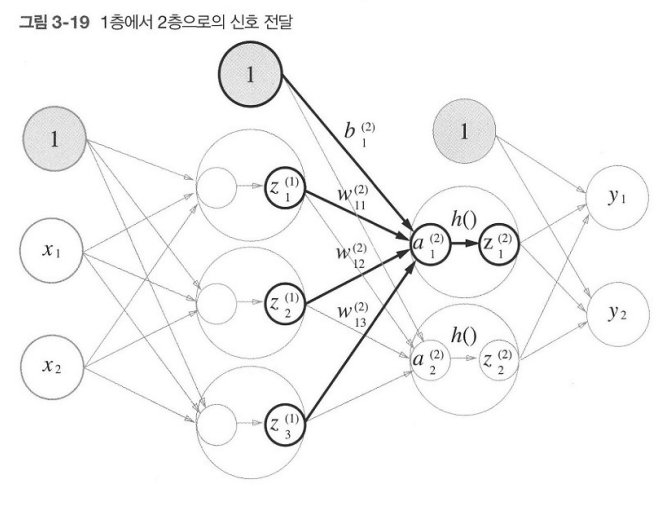

In [48]:
#1층에서 2층으로 신호 전달
W2 = np.array([[0.1, 0.4],[0.2,0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2  #2층으로 전달된 신호, 입력은 1층에서의 출력이다
Z2 = sigmoid(A2) #2층으로 전달된 신호 활성화 함수 처리


print('2층으로 전달된 신호 : ',A2)
print('활성화 함수 처리한 신호  : ', Z2)

2층으로 전달된 신호 :  [0.51615984 1.21402696]
활성화 함수 처리한 신호  :  [0.62624937 0.7710107 ]


- 2층에서 출력층으로의 신호 전달 구현이다.
- 활성화 함수를 제외하고 은닉층과 동일하다.

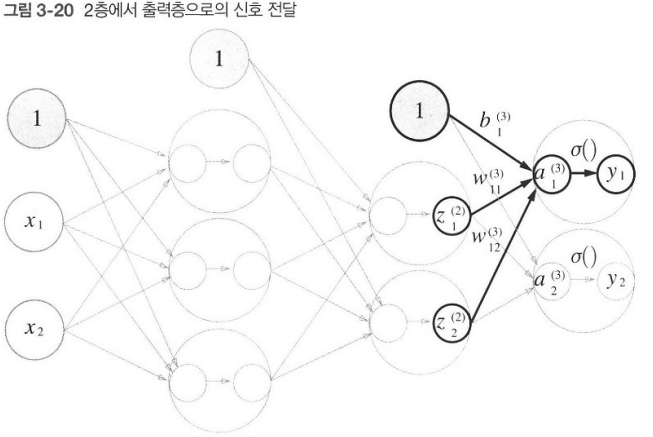

In [49]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3  #출력층으로 전달된 신호, 입력은 2층에서의 출력이다
Y = identity_function(A3) #항등함수, 출력층의 활성화함수이다


print('출력층으로 전달된 신호 : ',A3)
print('활성화함수 함수 처리한 신호  : ', Y)


출력층으로 전달된 신호 :  [0.31682708 0.69627909]
활성화함수 함수 처리한 신호  :  [0.31682708 0.69627909]


- 신경망의 순방향 구현이다(순전파). 넘파이의 다차원 배열을 사용하여 구현할 수 있다.
- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 설정. (회귀 - 항등, 분류 - 시그모이드, 다중분류 - 소프트맥스)


## 3.5 출력층 설계하기
- 신경망은 분류와 회귀 문제 모두에 사용 가능.
- 회귀(연속적인 수치) : 항등 함수
 - 입력을 그대로 출력.(입력과 출력이 항상 같다)
- 분류(데이터가 어느 class에 속하느냐) : 소프트맥스
 - 소프트 맥스의 출력은 모든 입력신호로부터 화살표 받음
 - 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.<br>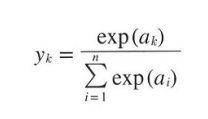

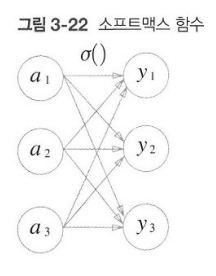

- 소프트맥스 함수를 구현해본다.

In [50]:
#위에서 나온 식을 그대로 구현
def softmax(a):
  exp_a = np.exp(a) #지수함수
  sum_exp_a = np.sum(exp_a) #지수함수의 합
  y = exp_a / sum_exp_a

  return y

- softmax식을 제대로 표현하고 있지만 컴퓨터로 사용할 때에는 오버플로 문제가 발생한다.
 - ex) $e^{1000}$ 은 무한대를 뜻하는 inf가 되어서 돌아온다
- 결과수치가 불안정해진다.

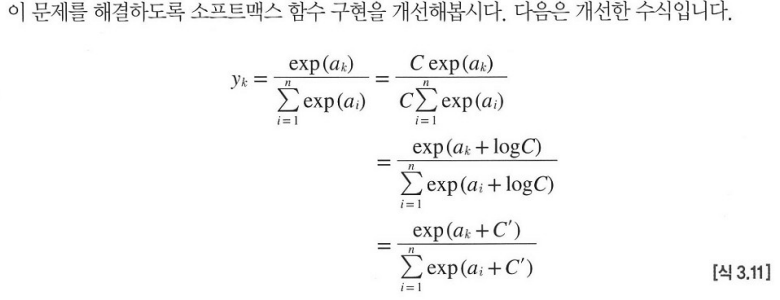

- 임의의 정수를 분자와 분모 양쪽에 곱해주고 C를 지수합수 안으로 옮겨서 logC로 만든 형태이다.
- 소프트맥스의 지수함수를 계산할 때 어떠한 정수를 더하더라도(빼더라도) 결과는 바뀌지 않음을 의미한다.
- 오버플로를 막을 목적으로 입력신호 중 최댓값을 이용하는것이 가능하다는 의미.

In [53]:
a = np.array([1010,1000,990])
np.exp(a) / np.sum(np.exp(a)) #해결방안이 적용되지 않은 상태의 계산

<ipython-input-53-544d211a2b09>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) #해결방안이 적용되지 않은 상태의 계산
<ipython-input-53-544d211a2b09>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) #해결방안이 적용되지 않은 상태의 계산


array([nan, nan, nan])

- 계산이 되지 않았음을 확인할 수 있다.

In [54]:
c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c)) #최댓값을 빼고 계산할 수 있다.

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- 이를 바탕으로 소프트맥스 함수를 다시 구현한다.

In [75]:
#오버플로 대책을 적용하여 다시 작성한 softmax함수이다.
def softmax_c(a):
  c = np.max(a)
  exp_a = np.exp(a-c) #오버플로 대책 적용
  sum_exp_a = np.sum(exp_a) #지수함수의 합
  y = exp_a / sum_exp_a

  return y

In [76]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

- 위와 같이 softmax의 출력은 0과 1.0 사이의 실수
- 출력의 총 합은 1이다.
- 소프트맥스의 함수의 출력을 확률로 해석할 수 있다.
 - 지수함수 exp(x) 단조 증가 함수이기 때문.
 - 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.
 - 신경망으로 분류할 때 출력층의 소프트맥스 함수를 생략해도 된다.


- 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.

## 3.6 손글씨 숫자 인식
- 신경망의 순전파
-

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import sys, os
sys.path.append(os.pardir)
from content.mnist import load_mnist

In [79]:
#처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [80]:
print(x_train.shape)

(60000, 784)


5
(784,)
(28, 28)


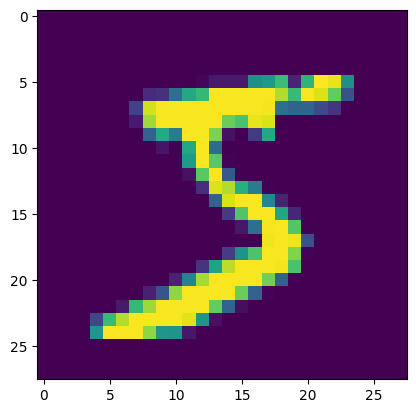

In [100]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from content.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

from matplotlib.pyplot import imshow

%matplotlib inline
pil_im = Image.fromarray(img)
imshow(np.asarray(pil_im))



- MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현한다
- 입력층 뉴런 784, 출력층 뉴런을 10개로 구성 (28*28 = 784) / 0 ~ 9

In [87]:
import pickle

file_path = "/content/sample_weight.pkl"

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False) #normalize:T 픽셀의 값 0.0~1.0 -normalization (preprocessing)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax_c(a3)

  return y

In [88]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) #배열에서 값이 가장 큰 원소의 인덱스 , 예측결과
  if p == t[i]:
    accuracy_cnt += 1

print("accuracy: " + str(float(accuracy_cnt)/len(x))) #정답 레이블을 비교하여 맞힌 숫자를 세고 전체 이미지 숫자로 나눠 정확도를 구한다

accuracy: 0.9352


- 구현한 신경망 각 층의 가중치 형상을 출력해보자

In [101]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [102]:
x[0].shape

(784,)

In [103]:
W1.shape

(784, 50)

In [104]:
W2.shape

(50, 100)

In [105]:
W3.shape

(100, 10)

- 다차원 배열에 대응하는 차원의 원소수 일치
- 최종 결과로 원소 10개인 1차원 배열 출력하고있다.<br>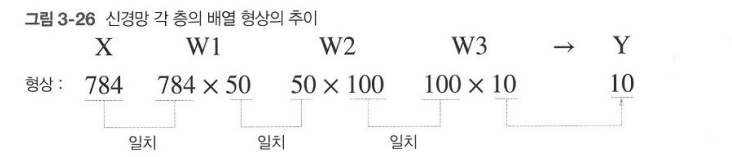

- 만약 100개 분량의 입력 데이터를 넣어준다면 100장 분량의 입력 데이터의 결과가 한번에 출력된다.

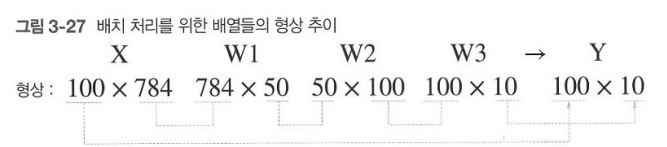

- 하나로 묶은 입력 데이터를 **배치**라고 한다.

In [106]:
x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accuracy_cnt = 0

for i in  range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("accuracy:"+ str(float(accuracy_cnt)/len(x)))

accuracy:0.9352


In [107]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [108]:
list(range(0,10,3))

[0, 3, 6, 9]

In [109]:
x = np.array([[0.1, 0.8, 0.1],[0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


# 정리

- 신경망에서는 활성화 함수로 시그모이드 함수의 ReLU함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습의 문제는 크게 회귀와 분류로 나뉠 수 있다.
- 출력층의 활성화 함수로는 회귀에서 항등함수, 분류에서는 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하러는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치단위로 진행하면 경과를 훨씬 빠르게 얻을 수 있다.
